### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

sns.set_style('darkgrid')

## Import Dataset

In [3]:
data=pd.read_csv('Iris.csv')
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X=df.iloc[:,[1,2,3,4]]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'SepalLength vs SepalWidth')

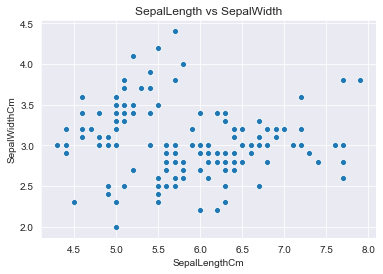

In [6]:
# plotting graph between Sepal length and width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=X)
plt.title('SepalLength vs SepalWidth')

Text(0.5, 1.0, 'PetalLength vs PetalWidth')

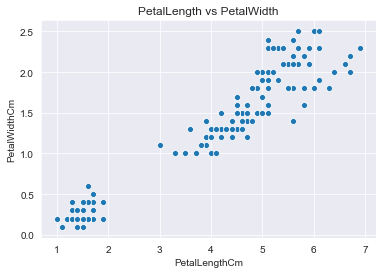

In [7]:
# plotting graph between Petal length and width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=X)
plt.title('PetalLength vs PetalWidth')

In [8]:
X_petal=df[['PetalLengthCm', 'PetalWidthCm']]
X_petal.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### K-means Clustering for Petal Length and Width

#### Choosing value of K

In [9]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, random_state=0 )
    kmeans.fit(X_petal)
    wcss.append(kmeans.inertia_)

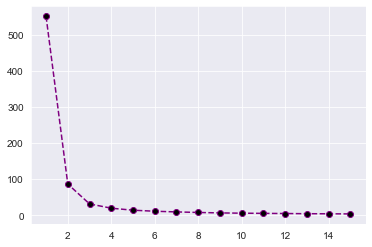

In [19]:
plt.plot(range(1,16), wcss, color='purple', ls='--', marker='o', markerfacecolor='black')

From above curve its clear that value of k is 3

In [20]:
Kmeans=KMeans(n_clusters=3, random_state=0)

In [21]:
y_predict=Kmeans.fit_predict(X_petal)

In [22]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
cc=Kmeans.cluster_centers_
cc

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

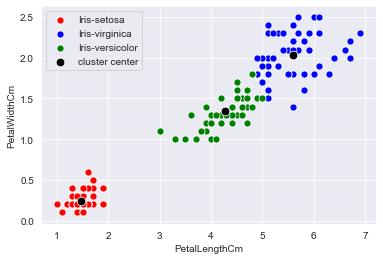

In [53]:
sns.scatterplot(X_petal.iloc[y_predict==0,0],X_petal.iloc[y_predict==0,1], color='red', s=50, label='Iris-setosa')
sns.scatterplot(X_petal.iloc[y_predict==1,0],X_petal.iloc[y_predict==1,1], color='blue', s=50, label='Iris-virginica')
sns.scatterplot(X_petal.iloc[y_predict==2,0],X_petal.iloc[y_predict==2,1], color='green', s=50, label='Iris-versicolor')
sns.scatterplot(cc[:,0], cc[:,1], color='black', s=75, label='cluster center')
plt.legend()